# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import random
df = pd.read_csv('DATA/matches2020.csv')
df

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,0,ESPORTSTMNT03/1241318,KeSPA,SANDBOX Gaming,T1,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,1,ESPORTSTMNT03/1241322,KeSPA,T1,SANDBOX Gaming,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,2,ESPORTSTMNT03/1241324,KeSPA,T1,SANDBOX Gaming,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,3,ESPORTSTMNT03/1241328,KeSPA,T1,SANDBOX Gaming,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,4,ESPORTSTMNT03/1241386,KeSPA,DRX,Afreeca Freecs,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,5607,ESPORTSTMNT03/1433741,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,5608,ESPORTSTMNT03/1433748,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,5609,ESPORTSTMNT03/1433749,LCS,Team SoloMid,FlyQuest,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,5610,ESPORTSTMNT03/1433751,LCS,FlyQuest,Team SoloMid,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


In [2]:
df.dtypes
df = df.drop(columns=["Unnamed: 0","gameid","league","blueteam","redteam"])
df.count()

bluetop        5612
bluejungle     5612
bluemid        5612
blueadc        5612
bluesupport    5612
redtop         5612
redjungle      5612
redmid         5612
redadc         5612
redsupport     5612
result         5612
dtype: int64

In [3]:
df = df.dropna()
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...
5607,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


### Load Hashmap

In [4]:
df_c = pd.read_csv('DATA/champion_stats.csv')

champkeys = {}

for i in range(len(df_c["key"])):
    champkeys[df_c["key"][i]] = df_c["id"][i]

champkeys

{266: 'Aatrox',
 103: 'Ahri',
 84: 'Akali',
 12: 'Alistar',
 32: 'Amumu',
 34: 'Anivia',
 1: 'Annie',
 523: 'Aphelios',
 22: 'Ashe',
 136: 'AurelionSol',
 268: 'Azir',
 432: 'Bard',
 53: 'Blitzcrank',
 63: 'Brand',
 201: 'Braum',
 51: 'Caitlyn',
 164: 'Camille',
 69: 'Cassiopeia',
 31: 'Chogath',
 42: 'Corki',
 122: 'Darius',
 131: 'Diana',
 119: 'Draven',
 36: 'DrMundo',
 245: 'Ekko',
 60: 'Elise',
 28: 'Evelynn',
 81: 'Ezreal',
 9: 'Fiddlesticks',
 114: 'Fiora',
 105: 'Fizz',
 3: 'Galio',
 41: 'Gangplank',
 86: 'Garen',
 150: 'Gnar',
 79: 'Gragas',
 104: 'Graves',
 120: 'Hecarim',
 74: 'Heimerdinger',
 420: 'Illaoi',
 39: 'Irelia',
 427: 'Ivern',
 40: 'Janna',
 59: 'JarvanIV',
 24: 'Jax',
 126: 'Jayce',
 202: 'Jhin',
 222: 'Jinx',
 145: 'Kaisa',
 429: 'Kalista',
 43: 'Karma',
 30: 'Karthus',
 38: 'Kassadin',
 55: 'Katarina',
 10: 'Kayle',
 141: 'Kayn',
 85: 'Kennen',
 121: 'Khazix',
 203: 'Kindred',
 240: 'Kled',
 96: 'KogMaw',
 7: 'Leblanc',
 64: 'LeeSin',
 89: 'Leona',
 876: 'Lilli

### Ranked Data

In [5]:
md = pd.read_csv('DATA/match_data_version1.csv')
md

,Unnamed: 0,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code
0,0,1.585155e+12,1323.0,4.247263e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
1,1,1.585152e+12,1317.0,4.247156e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
2,2,1.585059e+12,932.0,4.243963e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
3,3,1.584978e+12,2098.0,4.241678e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
4,4,1.584973e+12,2344.0,4.241539e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108824,0,1.579163e+12,1029.0,4.088497e+09,URF,MATCHED_GAME,10.1.303.9385,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN
108825,0,1.580823e+12,1544.0,4.130964e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
108826,0,1.580382e+12,2090.0,4.119954e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
108827,0,1.580805e+12,1382.0,4.130440e+09,URF,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN


In [6]:
df_r = df.copy()
for i in range(len(md["gameMode"])):
    if(i%1000 == 0):
        print(i)
        
    if(md["gameMode"][i] == "CLASSIC"):
        
        # get the champions
        next_index = len(df['bluetop'])
        #print(next_index)
        string = md["participants"][i]
        loc = 0
        loc_p = 0
        loc_l = 0
        loc_w = 0
        
        bt_f = False
        bm_f = False
        bs_f = False
        bb_f = False
        bj_f = False
        
        rt_f = False
        rm_f = False
        rs_f = False
        rb_f = False
        rj_f = False
        
        for p in range(10):
            
            #get win
            if(p == 0):
                loc_w = string.find("win", (loc_w+1), len(string)-1)
                won = string[loc_w+6:loc_w+10]
                bwin = 0
                if(won.lower() == "true"):
                    bwin = 1
            
            #get champ id
            loc = string.find("championId", (loc+1), len(string)-1)
            space = string.find(",", (loc+13), len(string)-1)
            try:
                champid = int(string[loc+13:space])
            except ValueError as err:
                print("err")
            
            #get position
            loc_p = string.find("role", (loc_p+1), len(string)-1)
            support = string[loc_p+12:loc_p+19]
            loc_l = string.find("lane", (loc_l+1), len(string)-1)
            lane = string[loc_l+8]
            #print(lane)
            #champid = string[loc+13:space]
            
            if(p < 5 and support == "SUPPORT"):
                df.at[next_index, "bluesupport"] = champkeys[champid]
                #print("bS: ", champkeys[champid])
                
            elif(p < 5 and support != "SUPPORT"):
                if(p < 5 and lane == "B"):
                    df.at[next_index, "blueadc"] = champkeys[champid]
                    #print("bB: ", champkeys[champid])
                elif(p < 5 and lane == "J"):
                    df.at[next_index, "bluejungle"] = champkeys[champid]
                    #print("bJ: ", champkeys[champid])
                elif(p < 5 and lane == "M"):
                    df.at[next_index, "bluemid"] = champkeys[champid]
                    #print("bM: ", champkeys[champid])
                elif(p < 5 and lane == "T"):
                    df.at[next_index, "bluetop"] = champkeys[champid]
                    #print("bT: ", champkeys[champid])
                
            if(p >= 5 and support == "SUPPORT"):
                df.at[next_index, "redsupport"] = champkeys[champid]
                #print("rS: ", champkeys[champid])
                
            elif(p >= 5 and support != "SUPPORT"):
                if(p >= 5 and lane == "B"):
                    df.at[next_index, "redadc"] = champkeys[champid]
                    #print("rB: ", champkeys[champid])
                elif(p >= 5 and lane == "J"):
                    df.at[next_index, "redjungle"] = champkeys[champid]
                    #print("rJ: ", champkeys[champid])
                elif(p >= 5 and lane == "M"):
                    df.at[next_index, "redmid"] = champkeys[champid]
                    #print("rM: ", champkeys[champid])
                elif(p >= 5 and lane == "T"):
                    df.at[next_index, "redtop"] = champkeys[champid]
                    #print("rT: ", champkeys[champid])
                
            #print(next_index)
                
            if(p == 0):
                df.at[next_index, "result"] = bwin
                #print("result: ", bwin)
            
        
        #break
            
            
    
#print(md["participants"][0])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
err
75000
76000
77000
78000
err
79000
80000
err
81000
82000
83000
84000
85000
86000
err
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
err
103000
104000
105000
106000
err
107000
108000


In [7]:
print(len(df["bluetop"]))
df = df.dropna()
print(len(df["bluetop"]))
df

98469
40432


,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...
98452,Darius,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
98459,Sett,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
98462,Garen,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
98463,Kassadin,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


### Unique Blue Teams

In [8]:

bluet = df[['bluetop','bluejungle','bluemid','blueadc','bluesupport']]
bluet

redt = df[['redtop','redjungle','redmid','redadc','redsupport']]
redt = redt.rename(columns={'redtop': 'bluetop', 'redjungle': 'bluejungle','redmid':'bluemid','redadc':'blueadc','redsupport':'bluesupport'})
allt = redt.append(bluet)
allt.groupby(['bluetop','bluejungle','bluemid','blueadc','bluesupport']).ngroups
allt

,bluetop,bluejungle,bluemid,blueadc,bluesupport
0,Aatrox,Gragas,Mordekaiser,Xayah,Rakan
1,Aatrox,Elise,Qiyana,Varus,TahmKench
2,Aatrox,Sejuani,Azir,MissFortune,Nautilus
3,Quinn,Olaf,Orianna,MissFortune,Leona
4,Renekton,Elise,Velkoz,Varus,Braum
...,...,...,...,...,...
98452,Darius,JarvanIV,Katarina,Vladimir,Yuumi
98459,Sett,RekSai,Katarina,Xayah,Pyke
98462,Garen,LeeSin,Leblanc,Aphelios,Bard
98463,Kassadin,LeeSin,Leblanc,Ezreal,Leona


### Unique Red Teams

In [9]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

39901

In [10]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

39901

### Unique Champions

In [11]:
topb = df['bluetop']
topr = df['redtop']
midb = df['bluemid']
midr = df['redmid']
jngb = df['bluejungle']
jngr = df['redjungle']
adcb = df['blueadc']
adcr = df['redadc']
supb = df['bluesupport']
supr = df['redsupport']
uni = df['redtop'].append(topb)
uni = uni.append(midb)
uni = uni.append(midr)
uni = uni.append(jngb)
uni = uni.append(jngr)
uni = uni.append(adcb)
uni = uni.append(adcr)
uni = uni.append(supb)
uni = uni.append(supr)
uni.nunique()
uni = uni.drop_duplicates()
uni

0          Aatrox
3           Quinn
4        Renekton
5        Vladimir
7          Irelia
           ...   
70858        Zyra
72171      Xerath
79074       Yuumi
92712      RekSai
41894       Braum
Length: 149, dtype: object

### Win Rate by Champion

In [12]:
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...
98452,Darius,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
98459,Sett,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
98462,Garen,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
98463,Kassadin,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


In [13]:
bluewins = df.query('result == 1 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [14]:
redwins = df.query('result == 0 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [15]:
bluelosses = df.query('result == 0 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [16]:
redlosses = df.query('result == 1 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [17]:
winrate = (bluewins+redwins)/(bluelosses+redlosses)

In [18]:
champs = []
winrates = []
totalplayed = []
for item in uni:
    champs.append(item)
    bluewins = df.query('result == 1 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redwins = df.query('result == 0 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    bluelosses = df.query('result == 0 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redlosses = df.query('result == 1 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    winrate = (bluewins+redwins)/(bluelosses+redlosses+bluewins+redwins)[0]
    winrates.append(winrate[0])
    totalplayed.append((bluelosses+redlosses+bluewins+redwins)[0])
    
print(winrates, totalplayed)



[0.4785581106277191, 0.5154929577464789, 0.49609862671660426, 0.52530199151159, 0.4595871238628412, 0.5028121484814398, 0.4986449864498645, 0.5, 0.4922784509384652, 0.5006310475389146, 0.512221618685497, 0.47765141496958474, 0.5223710458820177, 0.5144948755490483, 0.4828767123287671, 0.5096153846153846, 0.5003872966692486, 0.5114422565194252, 0.5150442477876106, 0.5033557046979866, 0.5285350781533987, 0.4998401704848162, 0.49654491609081935, 0.5055350553505535, 0.5055702917771884, 0.4904361132364193, 0.47395517867958814, 0.49077868852459017, 0.4672566371681416, 0.48385353330631, 0.48693778615674654, 0.4964493221433183, 0.49295774647887325, 0.5116586009678838, 0.4829700272479564, 0.4762924441725298, 0.5095513105286539, 0.46944151738672285, 0.5189718482252142, 0.49458483754512633, 0.49130434782608695, 0.48633879781420764, 0.48269581056466304, 0.5341426403641881, 0.48261474269819193, 0.4953560371517028, 0.49501246882793015, 0.44612068965517243, 0.5201361315938741, 0.5036344755970924, 0.52

In [19]:
ch_wr_gp = (champs, winrates, totalplayed)
d = {'champ': champs, 'winrate': winrates, 'totalplayed':totalplayed}
new = pd.DataFrame(data=d)
new = new.sort_values('totalplayed')

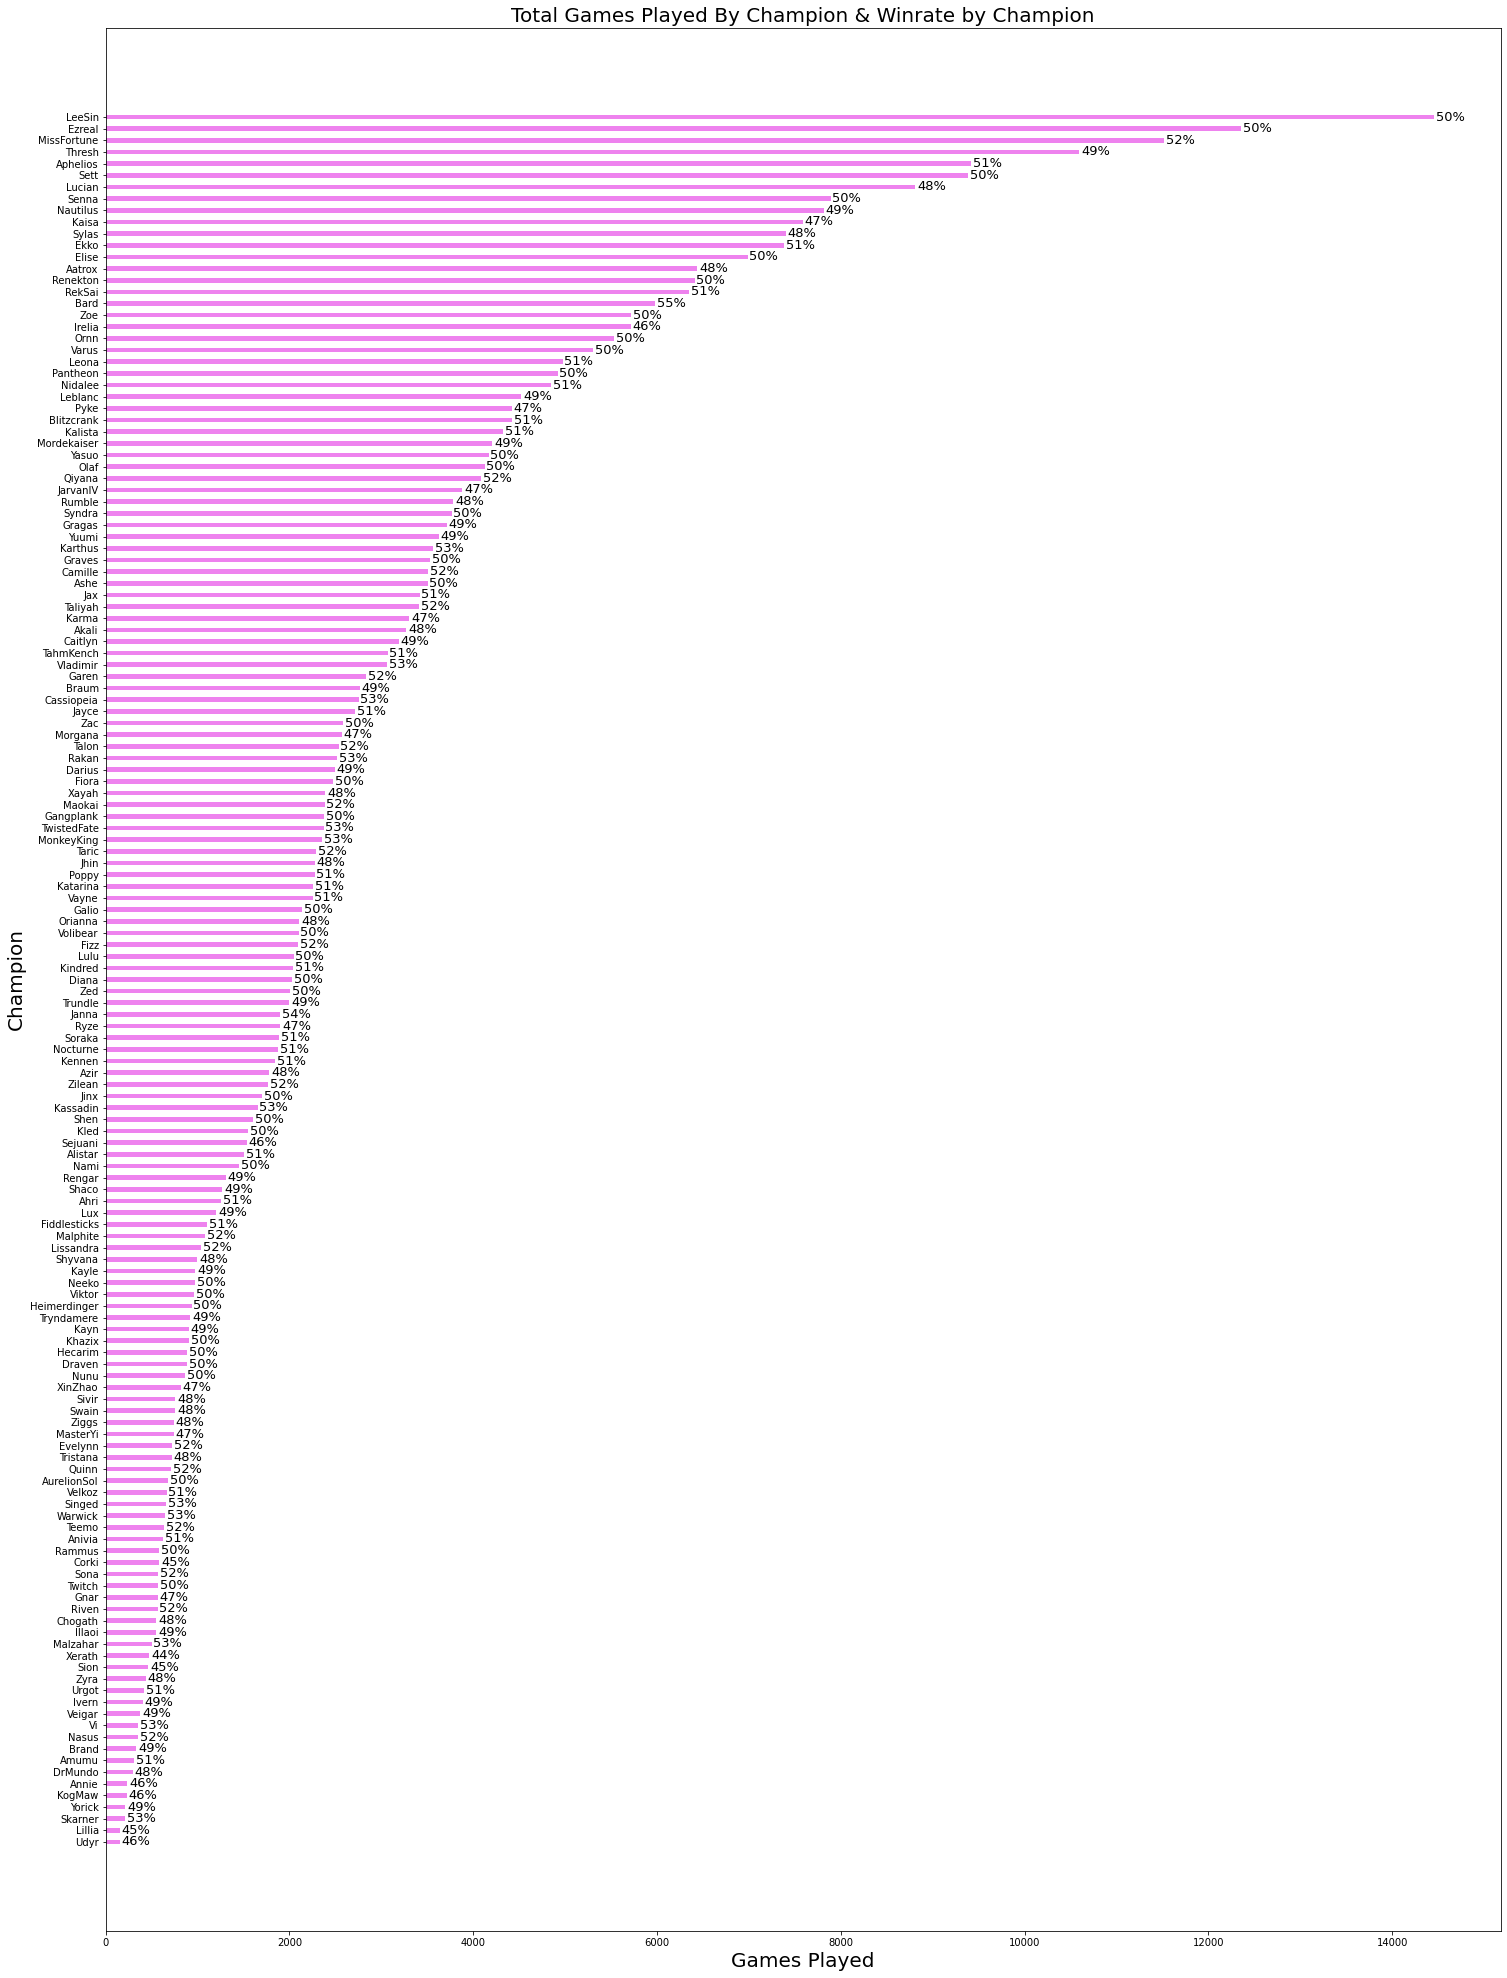

In [20]:


ind = np.arange(len(new['champ']))  # the x locations for the groups
width = .4  # the width of the bars

plt.figure(figsize=(25,35))
plt.barh(ind, new['totalplayed'], width,
                color='violet', label='Games Played')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Champion', size=20)
plt.xlabel('Games Played', size=20)
plt.title('Total Games Played By Champion & Winrate by Champion', size=20)
plt.yticks(ind, new['champ'])

for i, (p, pr) in enumerate(zip(new["winrate"], new["totalplayed"])):
    plt.text(s=('%.0f' % (p*100))+'%', x=(pr+20), y=i, color="black", verticalalignment="center", size=13)
    #plt.text(s=str(round(pr,0))+"%", x=pr-5, y=i, color="black",
             #verticalalignment="center", horizontalalignment="left", size=10)

plt.show()

In [23]:
df = df.reset_index()
df = df.drop(axis=1, labels=['index'])
df

,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,...,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
40428,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
40429,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
40430,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


In [ ]:
df_copy = df.copy()

### One Hot Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.insert(0, 'bt_class', 'NA')
df.insert(0, 'bt_subclass', 'NA')
df.insert(0, 'rt_class', 'NA')
df.insert(0, 'rt_subclass', 'NA')
df.insert(0, 'bm_class', 'NA')
df.insert(0, 'bm_subclass', 'NA')
df.insert(0, 'rm_class', 'NA')
df.insert(0, 'rm_subclass', 'NA')
df.insert(0, 'bj_class', 'NA')
df.insert(0, 'bj_subclass', 'NA')
df.insert(0, 'rj_class', 'NA')
df.insert(0, 'rj_subclass', 'NA')
df.insert(0, 'bb_class', 'NA')
df.insert(0, 'bb_subclass', 'NA')
df.insert(0, 'rb_class', 'NA')
df.insert(0, 'rb_subclass', 'NA')
df.insert(0, 'bs_class', 'NA')
df.insert(0, 'bs_subclass', 'NA')
df.insert(0, 'rs_class', 'NA')
df.insert(0, 'rs_subclass', 'NA')

In [24]:

for col in df:
    if (col != 'result' and col != 'bt_class' and
       col != 'bt_subclass' and col != 'rt_class' and 
        col != 'rt_subclass' and col != 'result' and 
        col != 'bm_subclass' and col != 'bm_class' and 
        col != 'rm_subclass' and col != 'rm_class' and 
        col != 'bj_subclass' and col != 'bj_class' and 
        col != 'rj_subclass' and col != 'rj_class' and 
        col != 'bb_subclass' and col != 'bb_class' and 
        col != 'rb_subclass' and col != 'rb_class' and 
        col != 'bs_subclass' and col != 'bs_class' and 
        col != 'rs_subclass' and col != 'rs_class'):
            
        for i in range(len(df['bluetop'])): 
            
            if(i%1000==0):
                print(i)
            
            if(df[col][i] == 'Bard' or df[col][i] == "Morgana" or
              df[col][i] == "Blitzcrank" or df[col][i] == "Neeko" or
              df[col][i] == "Ivern" or df[col][i] == 'Rakan' or
              df[col][i] == "Jhin" or df[col][i] == "Thresh" or
              df[col][i] == "Lux" or df[col][i] == "Zyra"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Controller"
                    df.at[i, "bt_subclass"] = "Catcher"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Controller"
                    df.at[i, "bm_subclass"] = "Catcher"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Controller"
                    df.at[i, "bj_subclass"] = "Catcher"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Controller"
                    df.at[i, "bb_subclass"] = "Catcher"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Controller"
                    df.at[i, "bs_subclass"] = "Catcher"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Controller"
                    df.at[i, "rt_subclass"]= "Catcher"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Controller"
                    df.at[i, "rm_subclass"] = "Catcher"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Controller"
                    df.at[i, "rj_subclass"] = "Catcher"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Controller"
                    df.at[i, "rb_subclass"] = "Catcher"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Controller"
                    df.at[i, "rs_subclass"] = "Catcher"
            
            
                
            elif(df[col][i] == "Janna" or df[col][i] == "Seraphine" or
              df[col][i] == "Karma" or df[col][i] == "Sona" or
              df[col][i] == "Lulu" or df[col][i] == "Soraka" or
              df[col][i] == "Nami" or df[col][i] == "Taric" or
              df[col][i] == "Senna" or df[col][i] == "Yuumi"):
                if col == 'bluetop':
                    df.at[i, "bt_class"]= "Controller"
                    df.at[i, "bt_subclass"] = "Enchanter"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Controller"
                    df.at[i, "bm_subclass"] = "Enchanter"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Controller"
                    df.at[i, "bj_subclass"] = "Enchanter"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Controller"
                    df.at[i, "bb_subclass"] = "Enchanter"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Controller"
                    df.at[i, "bs_subclass"] = "Enchanter"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Controller"
                    df.at[i, "rt_subclass"] = "Enchanter"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Controller"
                    df.at[i, "rm_subclass"]= "Enchanter"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Controller"
                    df.at[i, "rj_subclass"] = "Enchanter"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Controller"
                    df.at[i, "rb_subclass"] = "Enchanter"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Controller"
                    df.at[i, "rs_subclass"] = "Enchanter"
                
            elif(df[col][i] == "Camille" or df[col][i] == "Pantheon" or
              df[col][i] == "Diana" or df[col][i] == "RekSai" or
              df[col][i] == "Elise" or df[col][i] == "Renekton" or
              df[col][i] == "Hecarim" or df[col][i] == "Rengar" or
              df[col][i] == "Irelia" or df[col][i] == "Skarner" or
              df[col][i] == "JarvanIV" or df[col][i] == "Vi" or
              df[col][i] == "Keyn" or df[col][i] == "Warwick" or
              df[col][i] == "Kled" or df[col][i] == "MonkeyKing" or
              df[col][i] == "LeeSin" or df[col][i] == "XinZhao" or
              df[col][i] == "Olaf"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Fighter"
                    df.at[i, "bt_subclass"] = "Diver"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Fighter"
                    df.at[i, "bm_subclass"] = "Diver"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Fighter"
                    df.at[i, "bj_subclass"] = "Diver"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Fighter"
                    df.at[i, "bb_subclass"] = "Diver"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Fighter"
                    df.at[i, "bs_subclass"] = "Diver"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Fighter"
                    df.at[i, "rt_subclass"] = "Diver"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Fighter"
                    df.at[i, "rm_subclass"] = "Diver"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Fighter"
                    df.at[i, "rj_subclass"] = "Diver"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Fighter"
                    df.at[i, "rb_subclass"] = "Diver"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Fighter"
                    df.at[i, "rs_subclass"]= "Diver"
            
            elif(df[col][i] == "Aatrox" or df[col][i] == "Sett" or
              df[col][i] == "Darius" or df[col][i] == "Shyvana" or
              df[col][i] == "DrMundo" or df[col][i] == "Trundle" or
              df[col][i] == "Garen" or df[col][i] == "Udyr" or
              df[col][i] == "Illaoi" or df[col][i] == "Urgot" or
              df[col][i] == "Mordekaiser" or df[col][i] == "Volibear" or
              df[col][i] == "Nasus" or df[col][i] == "Yorick"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Fighter"
                    df.at[i, "bt_subclass"] = "Juggernaut"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Fighter"
                    df.at[i, "bm_subclass"] = "Juggernaut"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Fighter"
                    df.at[i, "bj_subclass"] = "Juggernaut"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Fighter"
                    df.at[i, "bb_subclass"] = "Juggernaut"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Fighter"
                    df.at[i, "bs_subclass"] = "Juggernaut"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Fighter"
                    df.at[i, "rt_subclass"] = "Juggernaut"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Fighter"
                    df.at[i, "rm_subclass"] = "Juggernaut"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Fighter"
                    df.at[i, "rj_subclass"] = "Juggernaut"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Fighter"
                    df.at[i, "rb_subclass"] = "Juggernaut"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Fighter"
                    df.at[i, "rs_subclass"] = "Juggernaut"
            
            elif(df[col][i] == "Jayce" or df[col][i] == "Xerath" or
              df[col][i] == "Lux" or df[col][i] == "Ziggs" or
              df[col][i] == "Varus" or df[col][i] == "Zoe" or
              df[col][i] == "Velkoz"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Mage"
                    df.at[i, "bt_subclass"] = "Artillery"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Mage"
                    df.at[i, "bm_subclass"] = "Artillery"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Mage"
                    df.at[i, "bj_subclass"] = "Artillery"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Mage"
                    df.at[i, "bb_subclass"] = "Artillery"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Mage"
                    df.at[i, "bs_subclass"] = "Artillery"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Mage"
                    df.at[i, "rt_subclass"] = "Artillery"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Mage"
                    df.at[i, "rm_subclass"] = "Artillery"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Mage"
                    df.at[i, "rj_subclass"] = "Artillery"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Mage"
                    df.at[i, "rb_subclass"] = "Artillery"
                elif col == 'redsupport':
                    df.at[i, "rs_class"]= "Mage"
                    df.at[i, "rs_subclass"] = "Artillery"
                    
            elif(df[col][i] == "Anivia" or df[col][i] == "Rumble" or
              df[col][i] == "AurelionSol" or df[col][i] == "Ryze" or
              df[col][i] == "Cassiopeia" or df[col][i] == "Swain" or
              df[col][i] == "Karthus" or df[col][i] == "Taliyah" or
              df[col][i] == "Malzahar" or df[col][i] == "Viktor" or
              df[col][i] == "Vladimir"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Mage"
                    df.at[i, "bt_subclass"] = "Battlemage"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Mage"
                    df.at[i, "bm_subclass"] = "Battlemage"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Mage"
                    df.at[i, "bj_subclass"] = "Battlemage"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Mage"
                    df.at[i, "bb_subclass"] = "Battlemage"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Mage"
                    df.at[i, "bs_subclass"] = "Battlemage"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Mage"
                    df.at[i, "rt_subclass"] = "Battlemage"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Mage"
                    df.at[i, "rm_subclass"] = "Battlemage"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Mage"
                    df.at[i, "rj_subclass"] = "Battlemage"
                elif col == 'redadc':
                    df.at[i, "rb_class"]= "Mage"
                    df.at[i, "rb_subclass"] = "Battlemage"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Mage"
                    df.at[i, "rs_subclass"] = "Battlemage"
                    
            elif(df[col][i] == "Ahri" or df[col][i] == "Lux" or
              df[col][i] == "Annie" or df[col][i] == "Orianna" or
              df[col][i] == "Brand" or df[col][i] == "Sylas" or
              df[col][i] == "Karma" or df[col][i] == "Syndra" or
              df[col][i] == "Leblanc" or df[col][i] == "TwistedFate" or
              df[col][i] == "Lissandra"  or df[col][i] == "Veigar" or
              df[col][i] == "Lux"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Mage"
                    df.at[i, "bt_subclass"] = "Burst"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Mage"
                    df.at[i, "bm_subclass"] = "Burst"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Mage"
                    df.at[i, "bj_subclass"] = "Burst"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Mage"
                    df.at[i, "bb_subclass"] = "Burst"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Mage"
                    df.at[i, "bs_subclass"] = "Burst"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Mage"
                    df.at[i, "rt_subclass"] = "Burst"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Mage"
                    df.at[i, "rm_subclass"] = "Burst"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Mage"
                    df.at[i, "rj_subclass"] = "Burst"
                elif col == 'redadc':
                    df.at[i, "rb_class"]= "Mage"
                    df.at[i, "rb_subclass"] = "Burst"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Mage"
                    df.at[i, "rs_subclass"] = "Burst"
                    
            elif(df[col][i] == "Aphelios" or df[col][i] == "KogMaw" or
              df[col][i] == "Ashe" or df[col][i] == "Lucian" or
              df[col][i] == "Caitlyn" or df[col][i] == "MissFortune" or
              df[col][i] == "Corki" or df[col][i] == "Quinn" or
              df[col][i] == "Draven" or df[col][i] == "Senna" or
              df[col][i] == "Ezreal" or df[col][i] == "Sivir" or
              df[col][i] == "Jhin" or df[col][i] == "Tristana" or
              df[col][i] == "Jinx" or df[col][i] == "Twitch" or
              df[col][i] == "Kaisa" or df[col][i] == "Vayne" or
              df[col][i] == "Kalista" or df[col][i] == "Xayah" or
              df[col][i] == "Kindred" or df[col][i] == "Varus"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Marksman"
                    df.at[i, "bt_subclass"] = "A"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Marksman"
                    df.at[i, "bm_subclass"] = "A"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Marksman"
                    df.at[i, "bj_subclass"] = "A"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Marksman"
                    df.at[i, "bb_subclass"] = "A"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Marksman"
                    df.at[i, "bs_subclass"] = "A"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Marksman"
                    df.at[i, "rt_subclass"]= "A"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Marksman"
                    df.at[i, "rm_subclass"] = "A"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Marksman"
                    df.at[i, "rj_subclass"] = "A"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Marksman"
                    df.at[i, "rb_subclass"] = "A"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Marksman"
                    df.at[i, "rs_subclass"] = "A"
                    
            elif(df[col][i] == "Akali" or df[col][i] == "Talon" or
              df[col][i] == "Ekko" or df[col][i] == "Yone" or
              df[col][i] == "Evelynn" or df[col][i] == "Zed" or
              df[col][i] == "Fizz" or df[col][i] == "Leblanc" or
              df[col][i] == "Kassadin" or df[col][i] == "Kayn" or
              df[col][i] == "Katarina" or
              df[col][i] == "Khazix"  or
              df[col][i] == "Nocturne"  or
              df[col][i] == "Pyke"  or
              df[col][i] == "Qiyana"  or
              df[col][i] == "Shaco"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Slayer"
                    df.at[i, "bt_subclass"] = "Assassin"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Slayer"
                    df.at[i, "bm_subclass"] = "Assassin"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Slayer"
                    df.at[i, "bj_subclass"] = "Assassin"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Slayer"
                    df.at[i, "bb_subclass"] = "Assassin"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Slayer"
                    df.at[i, "bs_subclass"] = "Assassin"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Slayer"
                    df.at[i, "rt_subclass"] = "Assassin"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Slayer"
                    df.at[i, "rm_subclass"] = "Assassin"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Slayer"
                    df.at[i, "rj_subclass"] = "Assassin"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Slayer"
                    df.at[i, "rb_subclass"] = "Assassin"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Slayer"
                    df.at[i, "rs_subclass"] = "Assassin"
                    
                    
            elif(df[col][i] == "Fiora" or df[col][i] == "Tryndamere" or
              df[col][i] == "Jax" or df[col][i] == "Yasuo" or
              df[col][i] == "Lillia" or 
              df[col][i] == "MasterYi" or
              df[col][i] == "Riven"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Slayer"
                    df.at[i, "bt_subclass"] = "Skirmisher"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Slayer"
                    df.at[i, "bm_subclass"] = "Skirmisher"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"]= "Slayer"
                    df.at[i, "bj_subclass"] = "Skirmisher"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Slayer"
                    df.at[i, "bb_subclass"] = "Skirmisher"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Slayer"
                    df.at[i, "bs_subclass"] = "Skirmisher"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Slayer"
                    df.at[i, "rt_subclass"] = "Skirmisher"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Slayer"
                    df.at[i, "rm_subclass"] = "Skirmisher"
                elif col == 'redjungle':
                    df.at[i, "rj_class"]= "Slayer"
                    df.at[i, "rj_subclass"] = "Skirmisher"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Slayer"
                    df.at[i, "rb_subclass"]= "Skirmisher"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Slayer"
                    df.at[i, "rs_subclass"] = "Skirmisher"
                    
            elif(df[col][i] == "Alistar" or df[col][i] == "Nautilus" or
              df[col][i] == "Amumu" or df[col][i] == "Sion" or
              df[col][i] == "Gnar" or df[col][i] == "Zac" or
              df[col][i] == "Gragas" or
              df[col][i] == "Leona" or
              df[col][i] == "Malphite" or
              df[col][i] == "Maokai"  or
              df[col][i] == "Nunu"  or
              df[col][i] == "Ornn"  or
              df[col][i] == "Rammus"  or
              df[col][i] == "Sejuani"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Tank"
                    df.at[i, "bt_subclass"] = "Vanguard"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Tank"
                    df.at[i, "bm_subclass"] = "Vanguard"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Tank"
                    df.at[i, "bj_subclass"]= "Vanguard"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Tank"
                    df.at[i, "bb_subclass"] = "Vanguard"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Tank"
                    df.at[i, "bs_subclass"] = "Vanguard"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Tank"
                    df.at[i, "rt_subclass"] = "Vanguard"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Tank"
                    df.at[i, "rm_subclass"] = "Vanguard"
                elif col == 'redjungle':
                    df.at[i, "rj_class"]= "Tank"
                    df.at[i, "rj_subclass"] = "Vanguard"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Tank"
                    df.at[i, "rb_subclass"] = "Vanguard"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Tank"
                    df.at[i, "rs_subclass"] = "Vanguard"
                    
            elif(df[col][i] == "Braum" or df[col][i] == "Shen" or
              df[col][i] == "Chogath" or df[col][i] == "TahmKench" or
              df[col][i] == "Galio" or df[col][i] == "Taric" or
              df[col][i] == "Poppy"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Tank"
                    df.at[i, "bt_subclass"] = "Warden"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Tank"
                    df.at[i, "bm_subclass"] = "Warden"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Tank"
                    df.at[i, "bj_subclass"] = "Warden"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Tank"
                    df.at[i, "bb_subclass"] = "Warden"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"]= "Tank"
                    df.at[i, "bs_subclass"] = "Warden"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Tank"
                    df.at[i, "rt_subclass"] = "Warden"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Tank"
                    df.at[i, "rm_subclass"]= "Warden"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Tank"
                    df.at[i, "rj_subclass"] = "Warden"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Tank"
                    df.at[i, "rb_subclass"] = "Warden"
                elif col == 'redsupport':
                    df.at[i, "rs_class"]= "Tank"
                    df.at[i, "rs_subclass"] = "Warden"
                    
            elif(df[col][i] == "Azir" or
              df[col][i] == "Fiddlesticks" or
              df[col][i] == "Gangplank" or
              df[col][i] == "Graves" or
              df[col][i] == "Heimerdinger" or
              df[col][i] == "Kayle" or
              df[col][i] == "Kennen" or 
              df[col][i] == "Nidalee" or
              df[col][i] == "Singed" or
              df[col][i] == "Teemo" or
              df[col][i] == "Zilean"):
                if col == 'bluetop':
                    df.at[i, "bt_class"] = "Specialist"
                    df.at[i, "bt_subclass"] = "B"
                elif col == 'bluemid':
                    df.at[i, "bm_class"] = "Specialist"
                    df.at[i, "bm_subclass"] = "B"
                elif col == 'bluejungle':
                    df.at[i, "bj_class"] = "Specialist"
                    df.at[i, "bj_subclass"] = "B"
                elif col == 'blueadc':
                    df.at[i, "bb_class"] = "Specialist"
                    df.at[i, "bb_subclass"] = "B"
                elif col == 'bluesupport':
                    df.at[i, "bs_class"] = "Specialist"
                    df.at[i, "bs_subclass"] = "B"
                elif col == 'redtop':
                    df.at[i, "rt_class"] = "Specialist"
                    df.at[i, "rt_subclass"] = "B"
                elif col == 'redmid':
                    df.at[i, "rm_class"] = "Specialist"
                    df.at[i, "rm_subclass"] = "B"
                elif col == 'redjungle':
                    df.at[i, "rj_class"] = "Specialist"
                    df.at[i, "rj_subclass"] = "B"
                elif col == 'redadc':
                    df.at[i, "rb_class"] = "Specialist"
                    df.at[i, "rb_subclass"] = "B"
                elif col == 'redsupport':
                    df.at[i, "rs_class"] = "Specialist"
                    df.at[i, "rs_subclass"] = "B"
                    
                    

In [25]:
df

,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,...,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Catcher,Controller,Vanguard,Tank,A,Marksman,A,Marksman,Vanguard,Tank,...,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,Warden,Tank,Vanguard,Tank,Artillery,Mage,A,Marksman,Diver,Fighter,...,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,Vanguard,Tank,Catcher,Controller,A,Marksman,A,Marksman,Vanguard,Tank,...,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,Vanguard,Tank,Catcher,Controller,A,Marksman,A,Marksman,Diver,Fighter,...,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,Warden,Tank,Catcher,Controller,Artillery,Mage,A,Marksman,Diver,Fighter,...,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,Enchanter,Controller,Enchanter,Controller,A,Marksman,Battlemage,Mage,Diver,Fighter,...,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
40428,Enchanter,Controller,Assassin,Slayer,A,Marksman,A,Marksman,Diver,Fighter,...,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
40429,Catcher,Controller,Catcher,Controller,Skirmisher,Slayer,A,Marksman,Assassin,Slayer,...,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
40430,Vanguard,Tank,Vanguard,Tank,A,Marksman,A,Marksman,Battlemage,Mage,...,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


In [26]:
for col in df:
    if col != 'result':
        for i in range(len(df['bluetop'])):
            
            if(i%1000==0):
                print(i)
                
            if(df[col][i] == 'NA'):
                print("s ", col, i, df['bluemid'][i])
                print(col, i, df['bluetop'][i])
                print(col, i, df['bluejungle'][i])
                print(col, i, df['bluesupport'][i])
                print(col, i, df['blueadc'][i])
                print(col, i, df['redtop'][i])
                print(col, i, df['redmid'][i])
                print(col, i, df['redjungle'][i])
                print(col, i, df['redadc'][i])
                print(col, i, df['redsupport'][i], ' e')

In [27]:
import tensorflow as tf
num_champions=150
champs_ = []
dic = {}
j=1
for col in df:
    if col != 'result':
        print(col)
        for i in range(len(df['bluetop'])):
            if(df[col][i] not in champs_):
                champs_.append(df[col][i])
                dic[df[col][i]] = j
                j = j + 1
                #print(df[col][i], j)
            

print(champs_)

rs_subclass
rs_class
bs_subclass
bs_class
rb_subclass
rb_class
bb_subclass
bb_class
rj_subclass
rj_class
bj_subclass
bj_class
rm_subclass
rm_class
bm_subclass
bm_class
rt_subclass
rt_class
bt_subclass
bt_class
bluetop
bluejungle
bluemid
blueadc
bluesupport
redtop
redjungle
redmid
redadc
redsupport
['Catcher', 'Warden', 'Vanguard', 'B', 'Enchanter', 'Diver', 'Battlemage', 'Assassin', 'Juggernaut', 'Burst', 'Artillery', 'A', 'Skirmisher', 'Controller', 'Tank', 'Specialist', 'Fighter', 'Mage', 'Slayer', 'Marksman', 'Rumble', 'Jayce', 'Renekton', 'Pantheon', 'Mordekaiser', 'Kennen', 'Camille', 'Aatrox', 'Ornn', 'Akali', 'Leblanc', 'Fiora', 'Sett', 'Gangplank', 'Vladimir', 'Irelia', 'Malphite', 'Swain', 'Gnar', 'Lucian', 'Sion', 'Poppy', 'Hecarim', 'Soraka', 'Kayle', 'Illaoi', 'Shen', 'Kled', 'Urgot', 'Chogath', 'Viktor', 'Sylas', 'Tristana', 'Sona', 'Quinn', 'Cassiopeia', 'Singed', 'Gragas', 'Olaf', 'Ryze', 'Darius', 'Zac', 'Maokai', 'Yorick', 'Karma', 'Nocturne', 'Yasuo', 'Kalista', 'Qiya

In [28]:
dic

{'Catcher': 1,
 'Warden': 2,
 'Vanguard': 3,
 'B': 4,
 'Enchanter': 5,
 'Diver': 6,
 'Battlemage': 7,
 'Assassin': 8,
 'Juggernaut': 9,
 'Burst': 10,
 'Artillery': 11,
 'A': 12,
 'Skirmisher': 13,
 'Controller': 14,
 'Tank': 15,
 'Specialist': 16,
 'Fighter': 17,
 'Mage': 18,
 'Slayer': 19,
 'Marksman': 20,
 'Rumble': 21,
 'Jayce': 22,
 'Renekton': 23,
 'Pantheon': 24,
 'Mordekaiser': 25,
 'Kennen': 26,
 'Camille': 27,
 'Aatrox': 28,
 'Ornn': 29,
 'Akali': 30,
 'Leblanc': 31,
 'Fiora': 32,
 'Sett': 33,
 'Gangplank': 34,
 'Vladimir': 35,
 'Irelia': 36,
 'Malphite': 37,
 'Swain': 38,
 'Gnar': 39,
 'Lucian': 40,
 'Sion': 41,
 'Poppy': 42,
 'Hecarim': 43,
 'Soraka': 44,
 'Kayle': 45,
 'Illaoi': 46,
 'Shen': 47,
 'Kled': 48,
 'Urgot': 49,
 'Chogath': 50,
 'Viktor': 51,
 'Sylas': 52,
 'Tristana': 53,
 'Sona': 54,
 'Quinn': 55,
 'Cassiopeia': 56,
 'Singed': 57,
 'Gragas': 58,
 'Olaf': 59,
 'Ryze': 60,
 'Darius': 61,
 'Zac': 62,
 'Maokai': 63,
 'Yorick': 64,
 'Karma': 65,
 'Nocturne': 66,
 'Ya

In [29]:

for col in df:
    if col != 'result':
        for i in range(len(df['bluetop'])):
            
            if(i%1000==0):
                print(i)
                
            #print(df[col][i])
            df.at[i, col] = dic[df[col][i]]
            
df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,...,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,1,14,3,15,12,20,12,20,3,15,...,136,69,138,83,28,58,25,152,155,1.0
1,2,15,3,15,11,18,12,20,6,17,...,72,122,138,83,28,136,69,164,144,0.0
2,3,15,1,14,12,20,12,20,3,15,...,134,25,152,155,28,121,132,138,83,1.0
3,3,15,1,14,12,20,12,20,6,17,...,136,83,152,155,55,59,122,138,154,0.0
4,2,15,1,14,11,18,12,20,6,17,...,72,60,152,155,23,136,149,164,168,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,5,14,5,14,12,20,7,18,6,17,...,72,117,35,163,25,80,128,138,103,0.0
40428,5,14,8,19,12,20,12,20,6,17,...,134,117,152,119,44,59,110,40,103,1.0
40429,1,14,1,14,13,19,12,20,8,19,...,80,31,101,73,95,100,27,67,150,0.0
40430,3,15,3,15,12,20,12,20,7,18,...,80,31,151,154,27,148,107,138,83,0.0


In [412]:
X = df.copy()

### Randomize SHuffle

In [413]:
X=X.sample(frac=1)
X

,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,...,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
26391,5,14,5,14,12,20,12,20,8,19,...,136,142,151,65,29,66,75,101,103,0.0
20663,5,14,1,14,12,20,12,20,6,17,...,136,24,53,73,34,108,66,151,103,1.0
38705,5,14,8,19,7,18,11,18,4,16,...,148,24,164,119,95,104,27,21,103,0.0
39852,12,20,8,19,12,20,12,20,6,17,...,80,60,77,119,81,80,100,101,159,0.0
11501,5,14,5,14,11,18,12,20,3,15,...,74,52,151,103,23,121,107,164,65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33238,3,15,5,14,12,20,12,20,6,17,...,59,67,40,163,21,88,97,138,58,0.0
35580,1,14,3,15,4,16,12,20,12,20,...,80,21,138,154,44,143,79,96,150,1.0
26984,5,14,3,15,5,14,12,20,6,17,...,66,148,138,83,28,80,79,103,44,0.0
26964,8,19,1,14,12,20,12,20,6,17,...,100,118,161,73,25,80,31,40,119,0.0


In [414]:
len(X.columns)

31

### Sklearn

In [415]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

results = X['result']
X = X.drop(axis=1,labels=['result'])
X = X.drop(axis=1,labels=['bluetop','redtop','bluejungle','redjungle','bluemid','redmid','blueadc','redadc','bluesupport','redsupport'])
#X = X.drop(axis=1,labels=["rs_subclass", "rs_class","bs_subclass", "bs_class", "rb_subclass", "rb_class", "bb_subclass", "bb_class", "rj_subclass", "rj_class", "bj_subclass", "bj_class", "rm_subclass", "rm_class", "bm_subclass", "bm_class", "rt_subclass", "rt_class", "bt_subclass", "bt_class"])

In [411]:
X

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport
23166,57,74,56,138,73,71,113,153,40,168
39593,67,98,31,152,155,29,72,112,152,160
5281,35,115,132,103,83,47,86,127,167,139
5663,26,148,31,68,33,36,102,23,131,83
36168,49,27,112,145,168,29,59,79,159,150
...,...,...,...,...,...,...,...,...,...,...
32070,76,62,36,103,160,81,102,107,151,140
3103,71,104,33,152,154,25,80,30,101,83
17720,51,136,36,151,73,33,100,98,96,119
18604,71,113,21,101,150,63,136,96,159,92


### Tensorflow

In [345]:
import tensorflow as tf

In [353]:
model_emb = tf.keras.models.Sequential([tf.keras.layers.Embedding(168, 10, input_length=30)])

model = tf.keras.models.Sequential([tf.keras.layers.Embedding(170, 10, input_length=10),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(200, activation='tanh', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(500, activation='tanh', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.6),
                                    tf.keras.layers.Dense(100, activation='tanh', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.6),
                                    tf.keras.layers.Dense(500, activation='tanh', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.6),
                                    tf.keras.layers.Dense(200, activation='tanh', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.6),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])

In [354]:
model_emb.compile('rmsprop', 'mse')


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [355]:
input_array = np.asarray(X.values).astype(np.float32)
target = np.asarray(results.values)
target

array([0., 0., 1., ..., 1., 1., 1.])

In [356]:
#output_array = model_emb.predict(input_array)
#print(output_array.shape)
#output_array

In [379]:
#X_train, X_test, y_train, y_test = train_test_split(output_array, results, random_state=19)
X_train, X_test, y_train, y_test = train_test_split(input_array, target, random_state=3)

In [374]:
history = model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_split=.30)

Epoch 1/10
22/22 [==============================] - 1s 52ms/step - loss: 0.6670 - accuracy: 0.6125 - val_loss: 0.6975 - val_accuracy: 0.5395
Epoch 2/10
22/22 [==============================] - 1s 43ms/step - loss: 0.6643 - accuracy: 0.6154 - val_loss: 0.7035 - val_accuracy: 0.5414
Epoch 3/10
22/22 [==============================] - 1s 49ms/step - loss: 0.6633 - accuracy: 0.6143 - val_loss: 0.7032 - val_accuracy: 0.5434
Epoch 4/10
22/22 [==============================] - 1s 52ms/step - loss: 0.6669 - accuracy: 0.6116 - val_loss: 0.7029 - val_accuracy: 0.5396
Epoch 5/10
22/22 [==============================] - 1s 54ms/step - loss: 0.6666 - accuracy: 0.6131 - val_loss: 0.7002 - val_accuracy: 0.5414
Epoch 6/10
22/22 [==============================] - 1s 52ms/step - loss: 0.6632 - accuracy: 0.6155 - val_loss: 0.7019 - val_accuracy: 0.5398
Epoch 7/10
22/22 [==============================] - 1s 54ms/step - loss: 0.6625 - accuracy: 0.6173 - val_loss: 0.7025 - val_accuracy: 0.5433
Epoch 8/10
22

In [375]:
model.evaluate(X_test, y_test)

316/316 [==============================] - 1s 3ms/step - loss: 0.7007 - accuracy: 0.5436


[0.7006520628929138, 0.5436288118362427]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


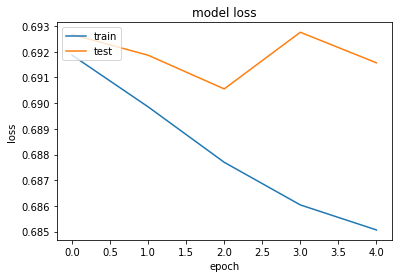

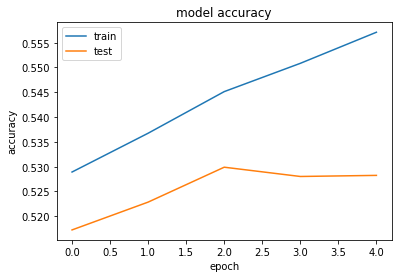

In [361]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [358]:
predictions = model.predict(X_test)
predictions

array([[0.5904704 ],
       [0.5690032 ],
       [0.41643104],
       ...,
       [0.2798969 ],
       [0.41975906],
       [0.5941305 ]], dtype=float32)

In [197]:
y_test

array([1, 0, 1, ..., 0, 1, 1])

### Naive Bayes

In [416]:
X = X.reset_index()
X = X.drop(axis=1, labels=['index'])
X

,rs_subclass,rs_class,bs_subclass,bs_class,rb_subclass,rb_class,bb_subclass,bb_class,rj_subclass,rj_class,bj_subclass,bj_class,rm_subclass,rm_class,bm_subclass,bm_class,rt_subclass,rt_class,bt_subclass,bt_class
0,5,14,5,14,12,20,12,20,8,19,6,17,10,18,10,18,3,15,9,17
1,5,14,1,14,12,20,12,20,6,17,6,17,8,19,6,17,4,16,4,16
2,5,14,8,19,7,18,11,18,4,16,7,18,6,17,6,17,9,17,9,17
3,12,20,8,19,12,20,12,20,6,17,6,17,8,19,7,18,13,19,12,20
4,5,14,5,14,11,18,12,20,3,15,4,16,8,19,10,18,6,17,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,3,15,5,14,12,20,12,20,6,17,6,17,10,18,13,19,7,18,9,17
40428,1,14,3,15,4,16,12,20,12,20,6,17,11,18,7,18,5,14,12,20
40429,5,14,3,15,5,14,12,20,6,17,8,19,11,18,7,18,9,17,13,19
40430,8,19,1,14,12,20,12,20,6,17,8,19,10,18,6,17,9,17,6,17


In [ ]:
for col in X:
    if col != 'result':
        for i in range(len(X['bluetop'])):
            
            if(i%1000==0):
                print(i)
                
            #print(df[col][i])
            X.at[i, col] = str(X[col][i])

In [419]:
input_array = np.asarray(X.values).astype(np.float32)
target = np.asarray(results.values)
target

array([0., 1., 0., ..., 0., 0., 1.])

In [420]:
X_train, X_test, y_train, y_test = train_test_split(input_array, target, random_state=3)

In [423]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(np.array(X_train).astype(int), np.array(y_train).astype(int))
np.array(X_train).astype(int)

array([[ 1, 14,  4, ..., 14, 11, 18],
       [ 1, 14,  3, ..., 15,  9, 17],
       [ 1, 14,  5, ..., 17,  6, 17],
       ...,
       [ 5, 14,  1, ..., 17,  9, 17],
       [11, 18,  1, ..., 18,  8, 19],
       [ 5, 14,  5, ..., 15,  8, 19]])

In [425]:
clf.score(np.array(X_test).astype(int), np.array(y_test).astype(int))

ValueError: Found input variables with inconsistent numbers of samples: [30324, 10108]